# Bagging

https://qiita.com/ground0state/items/105d16cdd6fb7a74d309

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from dtreeviz.trees import dtreeviz

In [3]:
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    loaded_data.data, loaded_data.target, random_state=0)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


以下はバギングに使うモデルを決定木にするので、たぶんこれは実質ランダムフォレスト。

In [4]:
model = BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=10, random_state=0) 

scores = {}
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score)
print(test_score)

0.9929577464788732
0.972027972027972


In [5]:
model.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(random_state=0),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [6]:
model.estimators_

[DecisionTreeClassifier(random_state=2087557356),
 DecisionTreeClassifier(random_state=132990059),
 DecisionTreeClassifier(random_state=1109697837),
 DecisionTreeClassifier(random_state=123230084),
 DecisionTreeClassifier(random_state=633163265),
 DecisionTreeClassifier(random_state=998640145),
 DecisionTreeClassifier(random_state=1452413565),
 DecisionTreeClassifier(random_state=2006313316),
 DecisionTreeClassifier(random_state=45050103),
 DecisionTreeClassifier(random_state=395371042)]

In [7]:
print("sampling num")
print(len(model.estimators_samples_[0].tolist()))
print("unique num")
print(len(set(model.estimators_samples_[0].tolist())))

sampling num
426
unique num
265


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


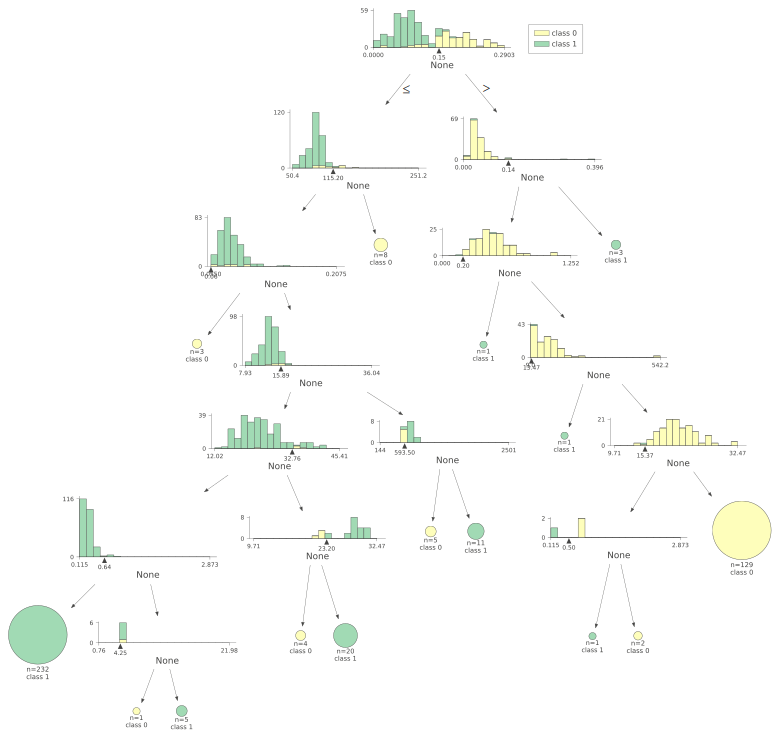

In [8]:
first_X_train = X_train[model.estimators_samples_[0]]
first_y_train = y_train[model.estimators_samples_[0]]
dtreeviz(model.estimators_[0], first_X_train, first_y_train)